# Subplot for the action potential in an epicardial cardiomyocyte
The figure should include a typical action potential from ten Tusscher model

Source: https://models.physiomeproject.org/e/80c/tentusscher_noble_noble_panfilov_2004_epi.cellml/cellml_math

Reference: https://github.com/SciML/CellMLToolkit.jl

In [1]:
using Pkg
Pkg.activate("../")
using DynamicalSystems
using DifferentialEquations
using CairoMakie

  Activating project at `~/git/projects/perspective_heart_and_brain`


In [2]:
Dt=1e-3

0.001

## Import code from CellML

In [42]:
using CellMLToolkit
ten_tusscher = CellModel("../src/tentusscher_noble_noble_panfilov_2004_epi.cellml")
p = list_params(ten_tusscher)
show(IOContext(stdout, :limit=>false),  MIME"text/plain"(), p)

75-element Vector{Any}:
                        sodium_dynamics₊Na_o => 140.0
                           sodium_dynamics₊F => 96.485
                          sodium_dynamics₊Cm => 185.0
                         sodium_dynamics₊V_c => 16404.0
                 potassium_pump_current₊g_pK => 0.0146
                   reversal_potentials₊P_kna => 0.03
                     reversal_potentials₊K_o => 5.4
                    reversal_potentials₊Na_o => 140.0
                    reversal_potentials₊Ca_o => 2.0
                       reversal_potentials₊R => 8.314
                       reversal_potentials₊F => 96.485
                       reversal_potentials₊T => 310.0
                  calcium_pump_current₊g_pCa => 0.825
                  calcium_pump_current₊K_pCa => 0.0005
                      potassium_dynamics₊K_o => 5.4
                        potassium_dynamics₊F => 96.485
                       potassium_dynamics₊Cm => 185.0
                      potassium_dynamics₊V_c => 16404.0
  

In [57]:
# system equations
sys = ten_tusscher.sys
println(typeof(sys))
display(sys)

Model ##cellml#232 with 17 equations
States (17):
  sodium_dynamics₊Na_i(time) [defaults to 11.6]
  fast_sodium_current_h_gate₊h(time) [defaults to 0.75]
  transient_outward_current_s_gate₊s(time) [defaults to 1.0]
  potassium_dynamics₊K_i(time) [defaults to 138.3]
⋮
Parameters (75):
  sodium_dynamics₊Na_o [defaults to 140.0]
  sodium_dynamics₊F [defaults to 96.485]
  sodium_dynamics₊Cm [defaults to 185.0]
  sodium_dynamics₊V_c [defaults to 16404.0]
⋮
Incidence matrix:17×34 SparseArrays.SparseMatrixCSC{Symbolics.Num, Int64} with 84 stored entries:
⎡⡙⣄⢀⣀⢁⢹⠀⠈⠈⠢⡀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⢸⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⎥
⎢⣀⣀⣀⣀⣑⣼⣀⢀⠀⠀⠀⠀⠈⠢⡀⠀⠀⎥
⎢⡀⠀⡀⠀⠀⢸⣑⣴⡀⠀⠀⠀⠀⠀⠈⠢⡀⎥
⎣⠀⠀⠁⠀⠀⠀⠀⠉⠁⠀⠀⠀⠀⠀⠀⠀⠈⎦

ModelingToolkit.ODESystem


In [43]:
# list_states
states = list_states(ten_tusscher)

17-element Vector{Any}:
                                sodium_dynamics₊Na_i(time) => 11.6
                        fast_sodium_current_h_gate₊h(time) => 0.75
                  transient_outward_current_s_gate₊s(time) => 1.0
                              potassium_dynamics₊K_i(time) => 138.3
                          L_type_Ca_current_d_gate₊d(time) => 0.0
 rapid_time_dependent_potassium_current_Xr2_gate₊Xr2(time) => 1.0
 rapid_time_dependent_potassium_current_Xr1_gate₊Xr1(time) => 0.0
                  transient_outward_current_r_gate₊r(time) => 0.0
                        fast_sodium_current_j_gate₊j(time) => 0.75
    slow_time_dependent_potassium_current_Xs_gate₊Xs(time) => 0.0
                        fast_sodium_current_m_gate₊m(time) => 0.0
                                          membrane₊V(time) => -86.2
                          L_type_Ca_current_f_gate₊f(time) => 1.0
                      L_type_Ca_current_fCa_gate₊fCa(time) => 1.0
                                  calcium_dyn

In [44]:
params = list_params(ten_tusscher)

75-element Vector{Any}:
        sodium_dynamics₊Na_o => 140.0
           sodium_dynamics₊F => 96.485
          sodium_dynamics₊Cm => 185.0
         sodium_dynamics₊V_c => 16404.0
 potassium_pump_current₊g_pK => 0.0146
   reversal_potentials₊P_kna => 0.03
     reversal_potentials₊K_o => 5.4
    reversal_potentials₊Na_o => 140.0
    reversal_potentials₊Ca_o => 2.0
       reversal_potentials₊R => 8.314
                             ⋮
    calcium_dynamics₊Vmax_up => 0.000425
      calcium_dynamics₊Buf_c => 0.15
    calcium_dynamics₊K_buf_c => 0.001
     calcium_dynamics₊Buf_sr => 10.0
   calcium_dynamics₊K_buf_sr => 0.3
       calcium_dynamics₊V_sr => 1094.0
        calcium_dynamics₊V_c => 16404.0
          calcium_dynamics₊F => 96.485
         calcium_dynamics₊Cm => 185.0

In [45]:
# show parameters connected to stimulus
for p in params
    name = string(p[1].name)
    if occursin("stim", name)
        println(p)
    end
end

membrane₊stim_start => 10.0
membrane₊stim_period => 1000.0
membrane₊stim_duration => 1.0
membrane₊stim_amplitude => -52.0


In [128]:
#TODO: individual stimulation pattern by iterative integration with different stimulus functions :)
# first stimulus is a short pulse from 1-2ms with membrane current of -20mV (not the opposite sign convention) until 10ms
update_list!(params, :membrane₊stim_start, 1.0)
update_list!(params, :membrane₊stim_duration, 1.0)
update_list!(params, :membrane₊stim_amplitude, -20.0)
update_list!(params, :membrane₊stim_period, 20.0)
# now integrate the system from 0 to 10 using DifferentialEquations
u0 = last.(list_states(ten_tusscher))
tspan = (0.0, 20.0)
prob = ODEProblem(ten_tusscher.sys, u0, tspan, last.(params))
sol = solve(prob, dtmax=1.0, saveat=0.01)
# append I and V
t = sol.t
V = map(x -> x[12], sol.u)
I = zeros(length(t))
I[ 1 .< t .< 2 ] .= -20
print(length(t))
# second stimulus is a short pulse from 11-12 with membrane current of -40mV (not the opposite sign convention) until 400ms
update_list!(params, :membrane₊stim_start, 21.0)
update_list!(params, :membrane₊stim_duration, 1.0)
update_list!(params, :membrane₊stim_amplitude, -30.0)
update_list!(params, :membrane₊stim_period, 400.0)
# now integrate the system from 10 to 400 using DifferentialEquations
u0 = sol.u[end]
tspan = (20.0, 400.0)
prob = ODEProblem(ten_tusscher.sys, u0, tspan, last.(params))
sol = solve(prob, dtmax=1.0, saveat=0.01)
# append I and V
t = vcat(t, sol.t)
V = vcat(V, map(x -> x[12], sol.u))
I = vcat(I, zeros(length(sol.t)))
I[ 21 .< t .< 22 ] .= -30





2001

99-element view(::Vector{Float64}, [2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112  …  2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201]) with eltype Float64:
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
   ⋮
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0
 -30.0

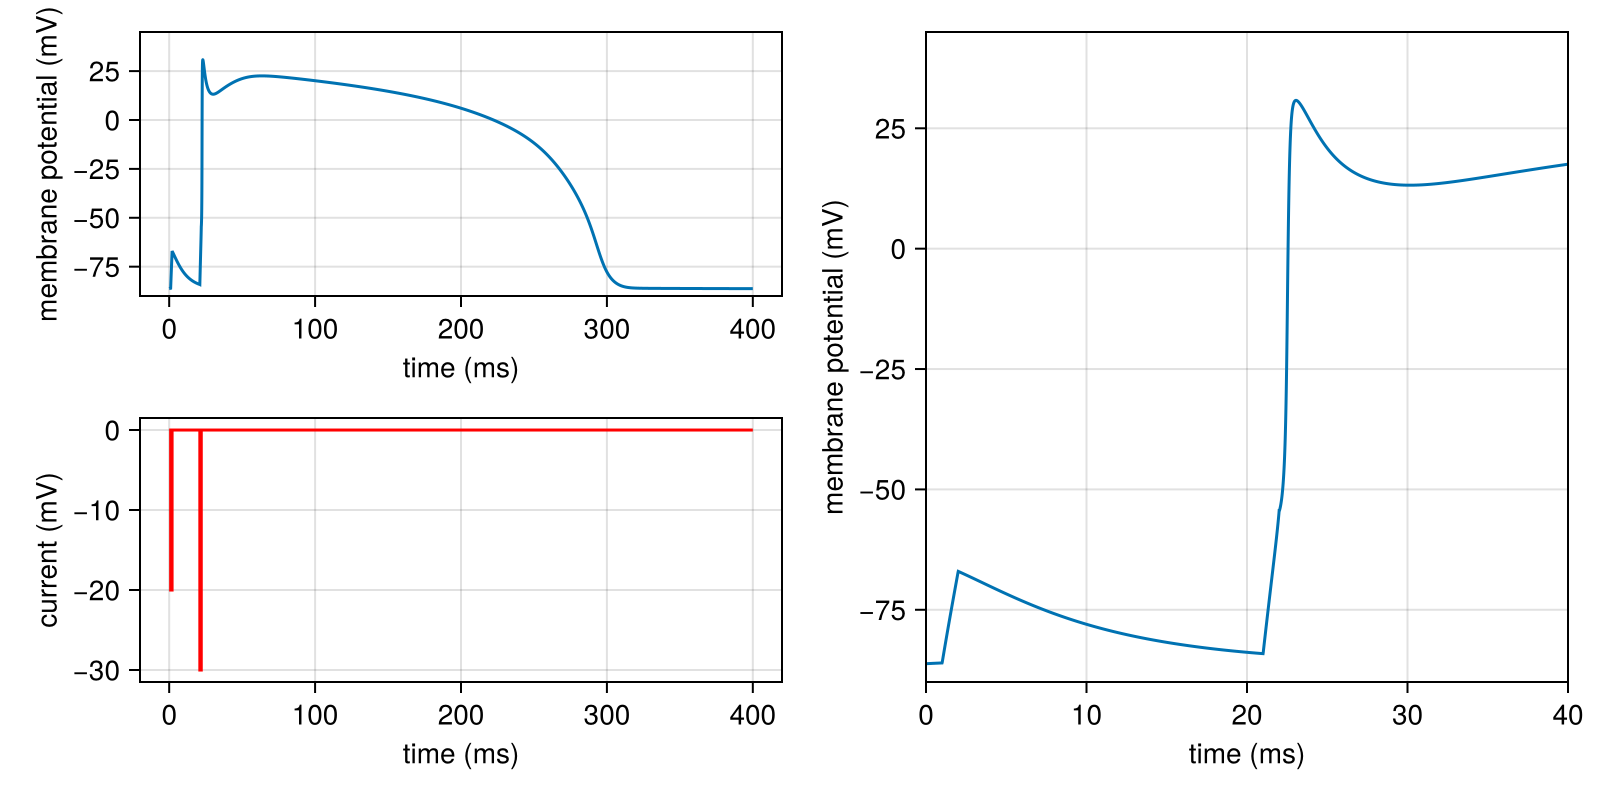

In [130]:
# plot with Makie of time series of membrane potential
fig = Figure(size = (800, 400))
ax = Axis(fig[1, 1]; xlabel = "time (ms)", ylabel = "membrane potential (mV)")
#I_t = [I_stim(t_) for t_ in t]
lines!(ax, t, V)
ylims!(ax, -90, 45)
# current
ax = Axis(fig[2, 1]; xlabel = "time (ms)", ylabel = "current (mV)")
lines!(ax, t, I, color = :red)
# zoom in to the first 50 ms on the right
ax = Axis(fig[:, 2]; xlabel = "time (ms)", ylabel = "membrane potential (mV)")
lines!(ax, t, V)
xlims!(ax, 0, 40)
ylims!(ax, -90, 45)
#ylims!(ax, -80, -0)
# save as pdf
save("../figures/tentusscher.pdf", fig)
fig

# Own attempt to implement

In [8]:
break

Dt = 1e-3 # ms
# implement Ten-Tusscher model that is of Hodgkin-Huxley type
# Reference for equations and parameters:
# Ten Tusscher, K. H. W. J., Noble, D., Noble, P. J., & Panfilov, A. V. (2004). A model for human ventricular tissue.
function ten_tuscher(; 
    return_gating_functions=false
    )
    # static parameters
    #membrane properties
    C_m = 2 # μF/cm²
    R = 8.314 # J/(mol*K)
    T = 310 # K
    F = 96.4867 # C/mmol
    # Na current
    G_Na = 14.838 # nS/pF
    Na_o = 140 # mM
    # Ca2+ current
    G_CaL = 1.75e-4 # cm^3/s/μF
    Ca_o = 2 # mM
    
    # K channel
    G_K1 = 5.405 # nS/pF
    K_o = 5.4 # mM

    # Fast Na+ current (28-39)
    m_∞(V) = 1 / (1 + exp((-56.86 - V)/9.03))^2
    α_m(V) = 1 / (1 + exp((-60 - V)/5))
    β_m(V) = 0.1 / (1 + exp((V + 35)/5)) + 0.1 / (1 + exp((V - 50)/200))
    τ_m(V) = α_m(V) * β_m(V)
    h_∞(V) = 1 / (1 + exp((V + 71.55)/7.43))^2
    α_h(V) = V < -40 ? 0.057 * exp(-(V + 80)/6) : 0
    β_h(V) = V < -40 ? 2.7 * exp(0.079 * V) + 3.1e5 * exp(0.3485 * V) : 0.77 / (0.13 * (1 + exp(-(V + 10.66)/11.1)))
    τ_h(V) = 1 / (α_h(V) + β_h(V))
    j_∞(V) = 1 / (1 + exp((V + 71.55)/7.43))^2
    α_j(V) = V < -40 ? (-25428 * exp(0.2444 * V) - 6.948e-6 * exp(-0.04391 * V)) * (V + 37.78) / (1 + exp(0.311 * (V + 79.23))) : 0
    β_j(V) = V < -40 ? 0.02424 * exp(-0.01052 * V) / (1 + exp(-0.1378 * (V + 40.14))) : 0.6 * exp(0.057 * V) / (1 + exp(-0.1 * (V + 32)))
    τ_j(V) = 1 / (α_j(V) + β_j(V))

    # L-type Ca2+ current (40-54)
    d_∞(V) = 1 / (1 + exp((-5-V)/7.5))
    α_d(V) = 1.4/(1 + exp((-35-V)/13)) + 0.25  
    β_d(V) = 1.4/(1 + exp((V+5)/5))
    γ_d(V) = 1/(1 + exp((50-V)/20))
    τ_d(V) = α_d(V) * β_d(V) + γ_d(V)
    f_∞(V) = 1 / (1 + exp((V + 20)/7))
    τ_f(V) = 1125 * exp(-((V + 27)^2)/240) + 165 / (1 + exp((25 - V)/10)) + 80
    α_f_Ca(Ca_i) = 1 / (1 + (Ca_i/0.000325)^8)
    β_f_Ca(Ca_i) = 0.1 / (1 + exp((Ca_i - 0.0005)/0.0001))
    γ_f_Ca(Ca_i) = 0.2 / (1 + exp((Ca_i - 0.00075)/0.0008))
    f_Ca_∞(Ca_i) = (α_f_Ca(Ca_i) + β_f_Ca(Ca_i) + γ_f_Ca(Ca_i) + 0.23) / 1.46
    τ_f_Ca = 2 # ms

    # transient outward currents (55-61), focus on epicardial cells
    r_∞(V) = 1 / (1 + exp((20-V)/6))
    τ_r(V) = 9.5 * exp((-(V+40)^2)/1800) + 0.8
    s_∞(V) = 1 / (1 + exp((V + 20)/5))
    τ_s(V) = 85 * exp((-(V+45)^2)/320) + 5 / (1 + exp((V - 20)/5)) + 3

    # slow delayed rectifier K+ current (62-66)
    Xs_∞(V) = 1 / (1 + exp((-5-V)/14))
    
    function f!(u, p, t)
        # u = [V, X_i, z_i]
        V = u[1]
        I_stim, = p

        # membrane currents [I_ion] = μA/cm²
        # standard units: nS/pF * mV = 1e-9 (A/V) * 1e12 (V/As) * 1e-3 V = V/s

        # reversal potentials (25-26)
        # [E_x] = [R][T]/[F] = J/mol/K*K/C*mmol = mJ/C = m Ws/C = mW/A = mV
        Na_i, K_i, Ca_i = u[2:4]
        E_Na = R*T/(z*F) * log(Na_o/Na_i) 
        E_K  = R*T/(z*F) * log(K_o/K_i) 
        E_Ca = R*T/(z*F) * log(Ca_o/Ca_i)
        E_Ks = R*T/(F) * log((K_o + p_KNa*Na_o)/(K_i + p_KNa*Na_i))

        # Na current (4)
        m,h,j = u[5:7]
        I_Na = G_Na * m^3 * h * j * (V - E_Na)
        du[5] = (m_∞(V) - m) / τ_m(V) 
        du[6] = (h_∞(V) - h) / τ_h(V) 
        du[7] = (j_∞(V) - j) / τ_j(V)

        # L-type Ca2+ current (5)
        d,f,f_Ca = u[8:10]
        I_CaL = G_CaL * d * f * f_Ca * 4 * V*F^2/(R*T) * (Ca_i * exp(2*V*F/(R*T)) - 0.341*Ca_o) / (exp(2*V*F/(R*T)) - 1)
        du[8] = (d_∞(V) - d) / τ_d(V)
        du[9] = (f_∞(V) - f) / τ_f(V)
        du[10] = (f_Ca_∞(Ca_i) - f_Ca) / τ_f_Ca
        if f_Ca_∞(Ca_i) > f_Ca and V > -60 
            du[10] = 0 # implements the k=0 case in the paper
        end

        # Transient outward current (6) for epicardial cells (relevant for s)
        r,s = u[11:12]
        I_to = G_to * r * s * (V - E_K)
        du[11] = (r_∞(V) - r) / τ_r(V)
        du[12] = (s_∞(V) - s) / τ_s(V)

        # Slow delayed rectifier currents (7)
        I_Ks = G_Ks * Xs^2 * (V - E_Ks)

        # Rapid delayed rectifier current (8)
        I_Kr = G_Kr * sqrt(K_o/5.4) * Xr1 * Xr2 * (V - E_K)

        # Inward rectifier K+ current (9)
        I_K1 = G_K1 * sqrt(K_o/5.4) * X_K1∞(V) * (V - E_K)

        # Na+/Ca2+ exchanger (10)
        α=2.5
        I_NaCa = k_NaCa * (exp(gamma*V*F/(R*T)) * Na_i^3 * Ca_o - exp((gamma-1)*V*F/(R*T)) * Na_o^3 * Ca_i * α) / (K_mNa^3 + Na_o^3) / (K_mCa + Ca_o) / (1 + k_sat * exp((gamma-1)*V*F/(R*T)))

        # Na+/K+ pump (11)
        I_NaK = R_NaK * K_o * Na_i / (K_o + K_mK) / (Na_i + K_mNa)/(1 + 0.1245 * exp(-0.1*V*F/(R*T)) + 0.0365 * exp(-V*F/(R*T)))

        # Ca2+ pump (12)
        I_pCa = G_pCa * Ca_i / (K_pCa + Ca_i)

        # K+ pump (13)
        I_pK = G_pK * (V - E_K)/(1 + exp((25-V)/5.98))

        # background currents (14-15)
        I_bNa = G_bNa * (V - E_Na)
        I_bCa = G_bCa * (V - E_Ca)

        # intracellular dynamics (16-22)
        I_leak = V_leak * (Ca_sr - Ca_i)
        I_up = V_maxup / (1 + (K_up^2 / Ca_i^2))
        I_rel = (a_rel * Ca_sr^2 / (b_rel^2 + Ca_sr^2) + c_rel) * dg
        Ca_ibufc = Ca_i 


        
        # sum all together
        I_ion = I_Na + I_CaL

        # change membrane potential [dV] = mV/ms
        # [dV] = (μA/cm²) / (μF/cm²) = mV/ms
        dV = - (I_ion - I_stim) / C_m
        du[1] = dV

        # in-place update of du 
        return nothing
    end

    # initial conditions (TODO)

    return f!, u0
end

ErrorException: syntax: break or continue outside loop